In [1]:
print("[INFO] importing necessary packages")
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D,Dropout
from keras.layers.core import Activation, Flatten, Dense
from keras import backend as K
from keras.optimizers import SGD
from sklearn.metrics import classification_report

[INFO] importing necessary packages


C:\Users\RAVIKUMAR\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print("[INFO] loading data from keras datasets")
((train_data, train_labels), (test_data, test_labels)) = cifar10.load_data()

[INFO] loading data from keras datasets


In [3]:
print("[INFO] displaying shapes of the training and test datasets")
train_data.shape, test_data.shape

[INFO] displaying shapes of the training and test datasets


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
print("[INFO] Standardisation")
trainX = train_data.astype("float")/255.0
testX = test_data.astype("float")/255.0

[INFO] Standardisation


In [5]:
print("[INFO] label names")
labels = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

[INFO] label names


In [6]:
print("[INFO] converting labels from integers into vectors using sklearn library")
lb = LabelBinarizer()
trainY = lb.fit_transform(train_labels)
testY = lb.transform(test_labels)

[INFO] converting labels from integers into vectors using sklearn library


In [7]:
print("[INFO] input shape initialisation")
height = 32
width = 32
depth = 3
classes = 10
inputshape = (height, width, depth)

[INFO] input shape initialisation


[INFO] compiling model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 65s 1ms/step - loss: 1.8841 - acc: 0.3367 - val_loss: 1.6866 - val_acc: 0.4136
Epoch 2/40
50000/50000 [==============================] - 65s 1ms/step - loss: 1.5904 - acc: 0.4443 - val_loss: 1.4745 - val_acc: 0.4884
Epoch 3/40
50000/50000 [==============================] - 66s 1ms/step - loss: 1.4369 - acc: 0.4990 - val_loss: 1.3902 - val_acc: 0.5101
Epoch 4/40
50000/50000 [==============================] - 67s 1ms/step - loss: 1.3505 - acc: 0.5290 - val_loss: 1.3117 - val_acc: 0.5410
Epoch 5/40
50000/50000 [==============================] - 67s 1ms/step - loss: 1.3038 - acc: 0.5458 - val_loss: 1.3052 - val_acc: 0.5346
Epoch 6/40
50000/50000 [==============================] - 66s 1ms/step - loss: 1.2687 - acc: 0.5586 - val_loss: 1.2773 - val_acc: 0.5509
Epoch 7/40
50000/50000 [==============================] - 66s 1ms/step - lo

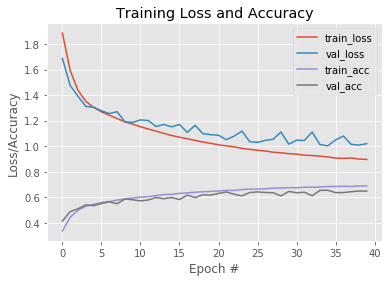

In [8]:
print("[INFO] compiling model...")
# using stochastic gradient descent optimiser
opt = SGD(lr=0.01)
model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", padding = "same", input_shape = inputshape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(classes))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#training the the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=labels))

#visualisation 
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                81930     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________
